## Classification problem/ Yes or NO 50K salary
Problem Statement: 

This dataset contains data of 32561 persons and the purpose is to create a model which classifies whether a person will get a 50K job or not. There are also nulls. The header is missing. The variables are: (in this order): Age, Workclass ,fnlwgt ,Education Education-num, Marital-Status, Occupation, Relationship, Race, Sex ,Capital-gain, Capital-loss, Hours-per-week Native_country , Salary (Target Variable)

### Importing libraries

In [263]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

### Uploading dataset

Uploading the dataset and adding index to it.

In [264]:
df = pd.read_csv('adult.data', header=None,
                names=["Age", "Workclass", "fnlwgt",
                "Education", "EducationNum",
                "Marital_Status", "Occupation",
                "Relationship", "Race", "Sex",
                "Capital_gain", "Capital_loss",
                "Hours_per_week", "Country",
                "Earnings_Raw"])

In [265]:
df.head()

,Age,Workclass,fnlwgt,Education,EducationNum,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Earnings_Raw
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [266]:
df.tail()

,Age,Workclass,fnlwgt,Education,EducationNum,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Earnings_Raw
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [267]:
df.shape

(32561, 15)

In [268]:
df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
EducationNum      0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Earnings_Raw      0
dtype: int64

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   EducationNum    32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Earnings_Raw    32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that the input variables are a mixture of numerical and categorical or ordinal data types, where the non-numerical columns are represented using strings. At a minimum, the categorical variables will need to be ordinal or one-hot encoded.

We can also see that the target variable is represented using strings. This column will need to be label encoded with 0 for the majority class and 1 for the minority class, as is the custom for binary imbalanced classification tasks.

In [270]:
print(df.describe())

                Age        fnlwgt  EducationNum  Capital_gain  Capital_loss  \
count  32561.000000  3.256100e+04  32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05     10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05      2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05     12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06     16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [271]:
print(df.apply(lambda x: (x==' ?').sum() ,axis=0))

rows_with_unknowns=df.apply(lambda x: (x==' ?').sum(), axis=1)>0
index=df[rows_with_unknowns].index.tolist()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
EducationNum         0
Marital_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Country            583
Earnings_Raw         0
dtype: int64


In [272]:
df['Country'] = df['Country'].replace('?',np.nan)
df['Workclass'] = df['Workclass'].replace('?',np.nan)
df['Occupation'] = df['Occupation'].replace('?',np.nan)


some of the data has Categorical values such as WorkClass, Education, Marital-Status, Occupation, Relationship, etc. we need to convert these into numerical notations.

In [273]:
df.head()

,Age,Workclass,fnlwgt,Education,EducationNum,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Earnings_Raw
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [274]:
# dropping the fnlwgt column
df.drop('fnlwgt',axis=1,inplace=True)

In [275]:
# replacing strings to binary values
df.replace([' <=50K',' >50K'],[0,1],inplace=True)

In [276]:
#gender encoded to 0 and 1 for male and female
df.replace([' Male',' Female'],[0,1],inplace=True)

In [277]:
df.tail()

,Age,Workclass,Education,EducationNum,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Earnings_Raw
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,United-States,0
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,1,15024,0,40,United-States,1


In [278]:
df.dropna(how='all', inplace=True)

In [279]:
# checking the unique value in workclass 
df["Workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [280]:
# checking the unique value in Education
df["Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [281]:
# checking the unique value in workclass 
df["Marital_Status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [282]:
# checking the unique value in Occupation 
df["Occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [283]:
# checking the unique value in Relationship
df["Relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [284]:
# checking the unique value in Race
df["Race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [285]:
# checking the unique value in Country
df["Country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

### Checking the feature distribution

<AxesSubplot: xlabel='Occupation'>

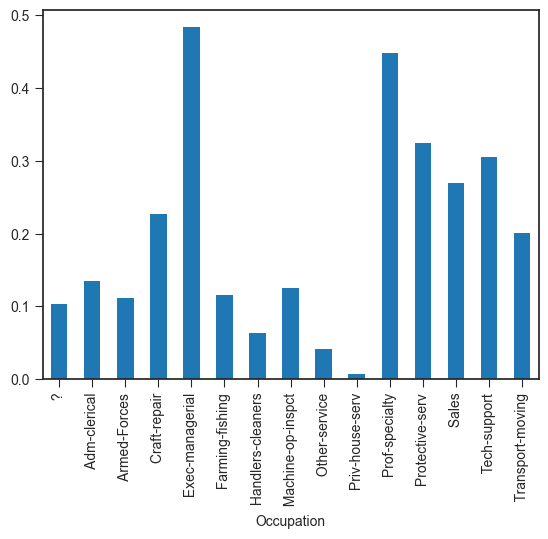

In [344]:
 #Check the distribution of 'workclass' feature
df.groupby('Occupation').Earnings_Raw.mean().plot(kind='bar')


<AxesSubplot: xlabel='Marital_Status'>

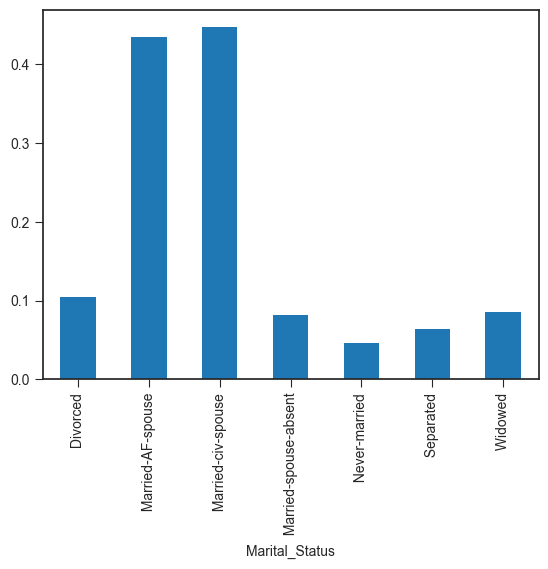

In [343]:
# Check the distribution of 'education' feature
df.groupby('Marital_Status').Earnings_Raw.mean().plot(kind='bar')

<AxesSubplot: xlabel='Education'>

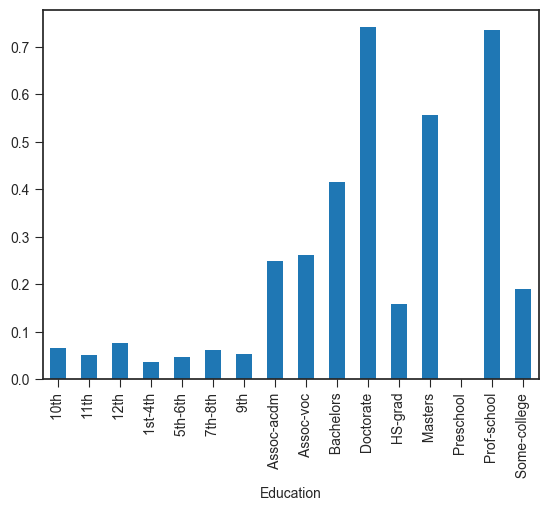

In [341]:
 #Check the distribution of 'marital-status' feature
df.groupby('Education').Earnings_Raw.mean().plot(kind='bar')

<AxesSubplot: xlabel='Workclass'>

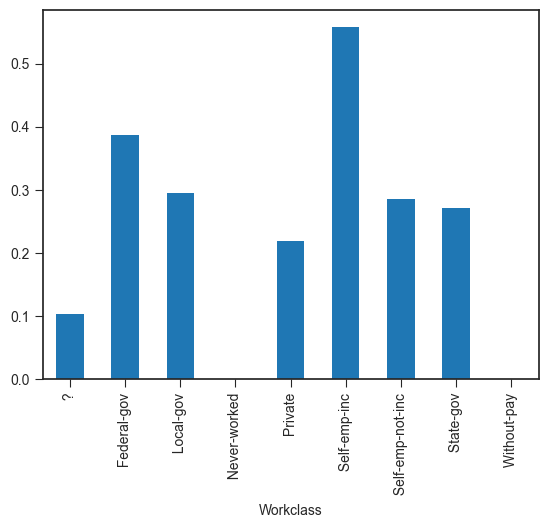

In [345]:
df.groupby('Workclass').Earnings_Raw.mean().plot(kind='bar')

<AxesSubplot: xlabel='Race'>

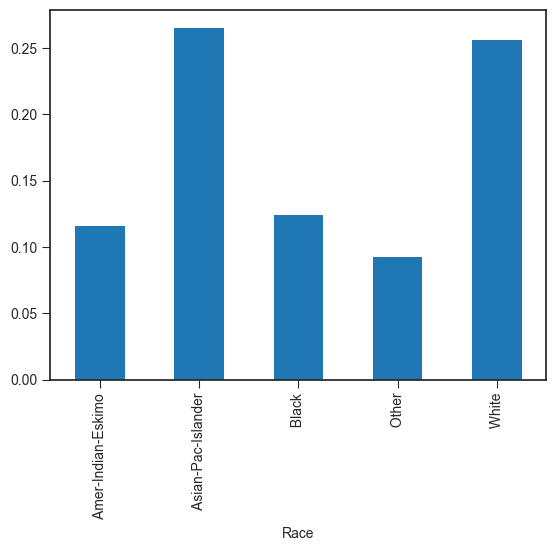

In [346]:
df.groupby('Race').Earnings_Raw.mean().plot(kind='bar')

<AxesSubplot: xlabel='Sex'>

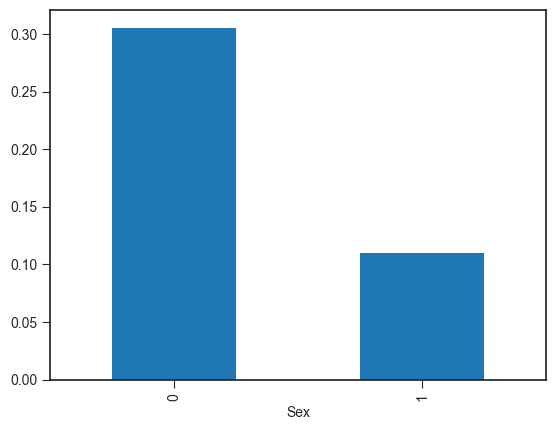

In [347]:
df.groupby('Sex').Earnings_Raw.mean().plot(kind='bar')

By these visualizations, we can define some correlations between our independent attributes and dependent attribute:

- Adults with an educational background of Prof-school (7) and Doctorate (10) will have a better income and it is likely possible that their income is higher than 50K.
- Our data suggest that people with occupation Prof-specialty (5) and Exec-managerial (7) will have a better chance of earning an income of more than 50K.
- The gender bar chart provides us some useful insight into the data that Men (0) are more likely to have a higher income.
- As per the data, an Asian-Pac-Islander (1) or a white (3) have more chances of earning more than 50K.
- Self-emp-in (0), Federal-gov(2) workclass groups have a higher chance of earning more than 50K.

In [ ]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df)

/var/folders/r2/9ds2618j6856jftkn59ymwrm0000gn/T/ipykernel_31211/3860035600.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor =df.corr()


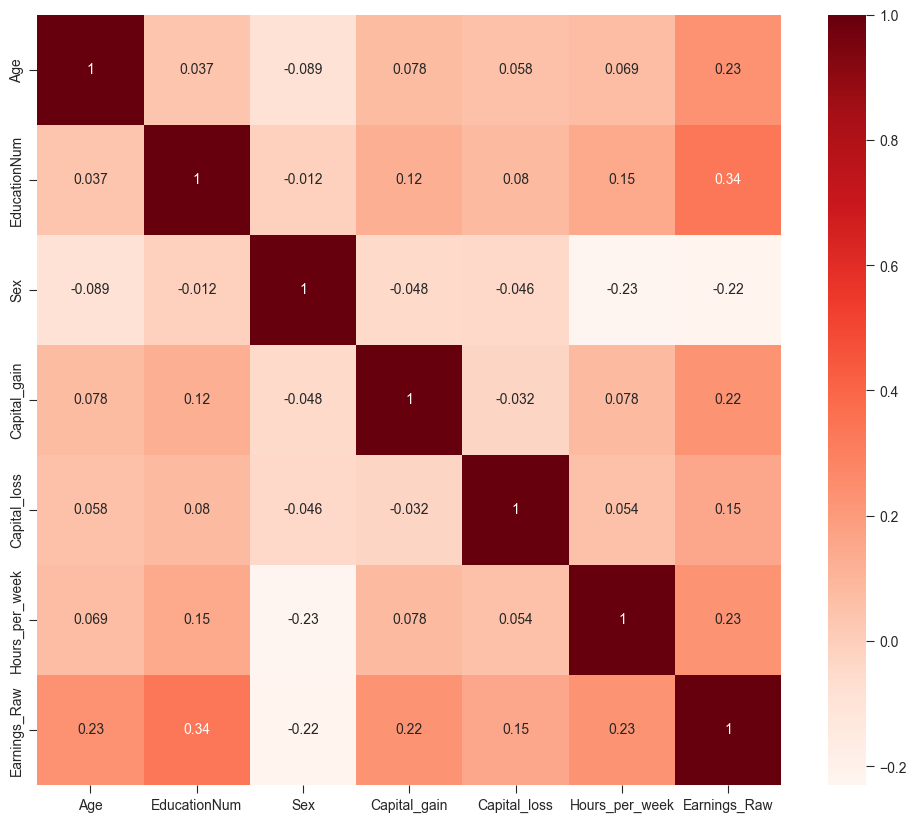

In [290]:
## Feature Correlation
plt.figure(figsize=(12,10))
cor =df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

/var/folders/r2/9ds2618j6856jftkn59ymwrm0000gn/T/ipykernel_31211/971085298.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


<AxesSubplot: xlabel='count', ylabel='Earnings_Raw'>

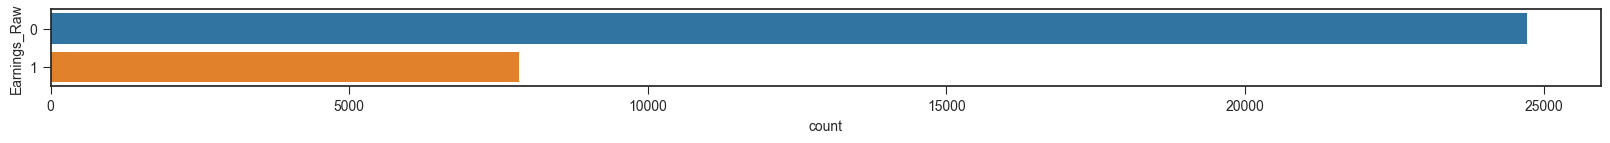

In [323]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="Earnings_Raw", data=df)

Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed. However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group.

The correlation chart shows the relation between the fatures with respect to target variable.

### Importing Necessary libraries 

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [292]:
# Applying the label encoder to transform the data

In [293]:
labeled_df = df.apply(LabelEncoder().fit_transform)
labeled_df.head()

,Age,Workclass,Education,EducationNum,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Earnings_Raw
0,22,7,9,12,4,1,1,4,0,25,0,39,39,0
1,33,6,9,12,2,4,0,4,0,0,0,12,39,0
2,21,4,11,8,0,6,1,4,0,0,0,39,39,0
3,36,4,1,6,2,6,0,2,0,0,0,39,39,0
4,11,4,9,12,2,10,5,2,1,0,0,39,5,0


### Creating features and target variable

In [295]:
y = labeled_df["Earnings_Raw"]
X = labeled_df.drop("Earnings_Raw", axis=1)
X.head()

,Age,Workclass,Education,EducationNum,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
0,22,7,9,12,4,1,1,4,0,25,0,39,39
1,33,6,9,12,2,4,0,4,0,0,0,12,39
2,21,4,11,8,0,6,1,4,0,0,0,39,39
3,36,4,1,6,2,6,0,2,0,0,0,39,39
4,11,4,9,12,2,10,5,2,1,0,0,39,5


### Splitting the train and test 

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [297]:
X_train.shape

(26048, 13)

In [298]:
X_test.shape

(6513, 13)

In [299]:
y_train.shape

(26048,)

In [300]:
y_test.shape

(6513,)

### Applying the machine learning models

#### Logistic Regression

In [301]:
#  Create model object Logistic Regression 
logreg = LogisticRegression(max_iter=3000)

# Fit model to training data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.8238906801781053


In [302]:
# Classification Report
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4942
           1       0.61      0.63      0.62      1571

    accuracy                           0.82      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.82      0.82      0.82      6513



### Decision Tree

In [330]:
decision_tree = DecisionTreeClassifier()    # Instantiate an object out of our class

# Fit model to training data
decision_tree.fit(X_train, y_train)
# Plot the Confusion Matrix for the testing dataset  
y_predict_test = decision_tree.predict(X_test)

In [331]:
score_decision_tree = decision_tree.score(X_test,y_test)
print('The accuracy of the Decision Tree is', score_decision_tree)

The accuracy of the Decision Tree is 0.8217411331183786


In [332]:
# Classification Report
print(classification_report(y_test,y_predict_test))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4942
           1       0.63      0.63      0.63      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



### Random Forest

In [333]:
# Create model object
rfc = RandomForestClassifier(n_estimators = 200)

# Fit model to training data
rfc.fit(X_train,y_train)
# Make predictions
rfc_pred = rfc.predict(X_test)

In [334]:

score_randomforest = rfc.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8541378780899739


In [335]:
# Classfication report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4942
           1       0.72      0.64      0.68      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



### Support Vector Machine

In [336]:
#Train the Model
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
#Making predictions
y_pred = svclassifier.predict(X_test)

In [337]:
print(confusion_matrix(y_test,y_pred))

[[4872   70]
 [1128  443]]


In [338]:
score_svc = svclassifier.score(X_test,y_test)
print('The accuracy of the SVM Model is', score_svc)

The accuracy of the SVM Model is 0.8160601873176724


In [339]:
# Classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4942
           1       0.86      0.28      0.43      1571

    accuracy                           0.82      6513
   macro avg       0.84      0.63      0.66      6513
weighted avg       0.82      0.82      0.78      6513



In this classification problem we have visualize the dataset and after performing the preprocessing of data we aplied machine learning models such as logistic regression, decision tree, random forest and support vector machine. 
where every model that we applied gave efficient results and performed well. The Random forest outperforms everyone and gave 85 % accuracy. With the help of this model we can easily classfiy person who is earning more than 50k. 
